# Asymmetric Experience Reply (ER_AML - ER_ACE)

## Paper results

Import of libraries and loading of results.

In [54]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('results.json') as file:
    results = json.load(file)

Loading test results.

In [33]:
test_results = {}
to_perc = lambda x: f'{round(x * 100, 2)} %'

for k, v in results.items():
    AAA, accuracy, hyperparams, _ = v['test']
    test_results[k] = dict(AAA=to_perc(AAA), accuracy=to_perc(accuracy), **json.loads(hyperparams))

Here are shown test results. They are lower by the ones on paper. The hyperparameters are selected using a gridsearch algorithm on values proposed by the paper. Differently from the paper we have also that ER_AML is better than ER_ACE in term of AAA and Accuracy.

In [40]:
pd.DataFrame(test_results)

,ER_AML,ER_ACE
AAA,15.46 %,10.38 %
accuracy,5.07 %,2.56 %
strategy_train_mb_size,10,10
strategy_eval_mb_size,10,10
strategy_train_epochs,1,1
strategy_mem_size,100,100
strategy_batch_size_mem,10,10
strategy_temp,0.1,NaN
sgd_lr,0.1,0.001
sgd_momentum,0,0


Plot of ER_AML and ER_ACE accuracy over experiences.

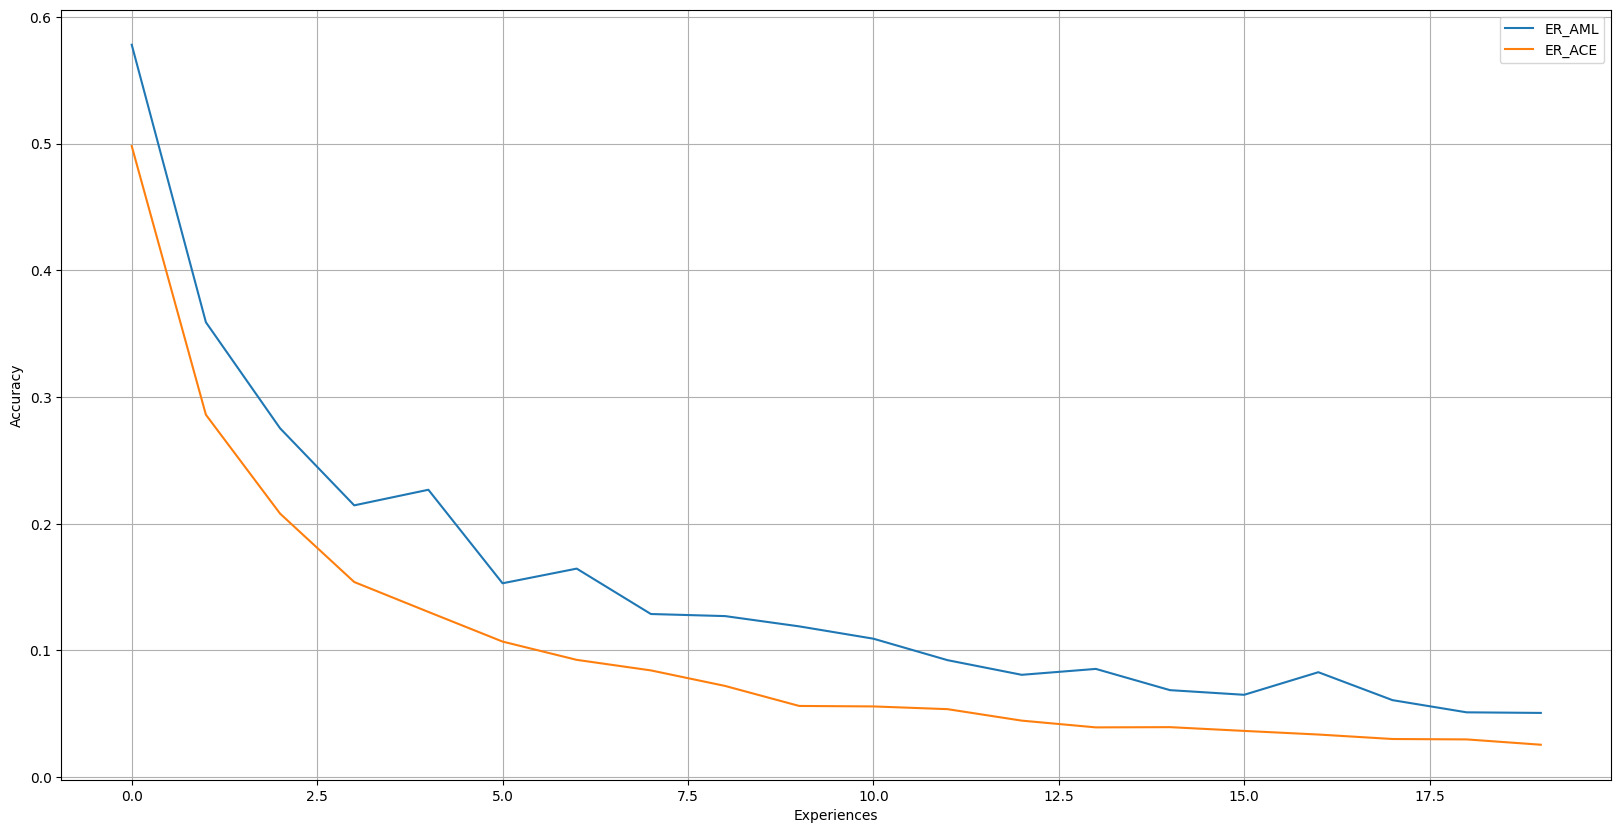

In [60]:
accuracy_over_exp = {k: [sum(x.values()) / len(x.values()) for x in v['test'][3]] for k, v in results.items()}

plt.figure(figsize=(20, 10))
for k, v in accuracy_over_exp.items():
    plt.plot(v, label=k)
plt.xlabel('Experiences')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## ER_ACE using big memory

Experiment with same hyperparams suggested by the official paper except the memory size that is set to 10000 (this is done using only ER_ACE because for ER_AML is computationally having exploiting all the memory for extracting positive and negative examples).

This test is related to the one in [https://github.com/ContinualAI/continual-learning-baselines](https://github.com/ContinualAI/continual-learning-baselines) for testing split cifar 100 with avalanche ER_ACE method.

In [63]:
from src.gridsearch.strategy_runner import run_strategy
from src.model import ResNet18
from src.benchmark import split_cifar100
from src.er_ace import ER_ACE

benchmark = split_cifar100(n_experiences=20, seed=0)
ERACE_AAA, ERACE_accuracy, ERACE_results = run_strategy(
    strategy_builder=ER_ACE,
    train_stream=benchmark.train_stream,
    eval_stream=benchmark.test_stream,
    model=ResNet18(benchmark.n_classes),
    hyperparams=dict(
        strategy_train_mb_size=10,
        strategy_eval_mb_size=10,
        strategy_train_epochs=1,
        strategy_mem_size=10000,
        strategy_batch_size_mem=10,
        sgd_lr=0.1,
        sgd_momentum=0
    ),
    num_workers=0,
    verbose=True
)

Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/lib/python3.10/site-packages/avalanche/training/plugins/evaluation.py:91: UserWarning: No loggers specified, metrics will not be logged
  warnings.warn("No loggers specified, metrics will not be logged")

AAA=0.4605, Accuracy=0.361:  10%|█         | 2/20 [00:53<08:01, 26.78s/it]
AAA=0.40677777777777774, Accuracy=0.2993333333333333:  10%|█         | 2/20 [01:21<08:01, 26.78s/it]
AAA=0.40677777777777774, Accuracy=0.2993333333333333:  15%|█▌        | 3/20 [01:21<07:46, 27.46s/it]
AAA=0.3732083333333333, Accuracy=0.27249999999999996:  15%|█▌        | 3/20 [01:51<07:46, 27.46s/it]
AAA=0.3732083333333333, Accuracy=0.27249999999999996:  20%|██        | 4/20 [01:51<07:36, 28.51s/it]
AAA=0.3441666666666666, Accuracy=0.22800000000000004:  20%|██        | 4/20 [02:23<07:36, 28.51s/it]
AAA=0.3441666666666666, Accuracy=0.22800000000000004:  25%|██▌       | 5/20 [02:23<07:26, 29.75s/it]
AAA=0.3293055555555555, Accuracy=0.25499999999999995:  25%|██▌       | 5/20 [02:57<07:26, 29.75s/it]

Same experiment using ER_ACE avalanche implementation (here we rename this strategy as ER_ACE_AVALANCHE)

In [65]:
from avalanche.training.supervised.er_ace import ER_ACE as ER_ACE_AVALANCHE

benchmark = split_cifar100(n_experiences=20, seed=0)
ERACE_AVALANCHE_AAA, ERACE_AVALANCHE_accuracy, ERACE_AVALANCHE_results = run_strategy(
    strategy_builder=ER_ACE_AVALANCHE,
    train_stream=benchmark.train_stream,
    eval_stream=benchmark.test_stream,
    model=ResNet18(benchmark.n_classes),
    hyperparams=dict(
        strategy_train_mb_size=10,
        strategy_eval_mb_size=10,
        strategy_train_epochs=1,
        strategy_mem_size=10000,
        strategy_batch_size_mem=10,
        sgd_lr=0.1,
        sgd_momentum=0
    ),
    num_workers=0,
    verbose=True
)

Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/lib/python3.10/site-packages/avalanche/training/plugins/evaluation.py:91: UserWarning: No loggers specified, metrics will not be logged
  warnings.warn("No loggers specified, metrics will not be logged")

AAA=0.44, Accuracy=0.448:  10%|█         | 2/20 [00:30<04:49, 16.09s/it]
AAA=0.4135555555555556, Accuracy=0.3606666666666667:  10%|█         | 2/20 [00:51<04:49, 16.09s/it]
AAA=0.4135555555555556, Accuracy=0.3606666666666667:  15%|█▌        | 3/20 [00:51<05:09, 18.20s/it]
AAA=0.3760416666666667, Accuracy=0.2635:  20%|██        | 4/20 [01:13<05:15, 19.72s/it]
AAA=0.3605933333333334, Accuracy=0.29880000000000007:  20%|██        | 4/20 [01:36<05:15, 19.72s/it]
AAA=0.3605933333333334, Accuracy=0.29880000000000007:  25%|██▌       | 5/20 [01:36<05:13, 20.90s/it]
AAA=0.3503277777777778, Accuracy=0.299:  30%|███       | 6/20 [01:59<05:05, 21.82s/it]
AAA=0.33807687074829934, Accuracy=0.26457142857142857:  30%|███       | 6/20 [02:23<05:05, 21.82s/it]
AAA=0.33807687074829934, Accu

ER_ACE and ER_ACE_AVALANCHE with memory 10000 performances.

In [66]:
big_memory_results = dict(
    ER_ACE=dict(
        AAA=ERACE_AAA,
        accuracy=ERACE_accuracy,
    ),
    ER_ACE_AVALANCHE=dict(
        AAA=ERACE_AVALANCHE_AAA,
        accuracy=ERACE_AVALANCHE_accuracy,
    ),
)

pd.DataFrame(big_memory_results)

,ER_ACE,ER_ACE_AVALANCHE
AAA,0.24294,0.287302
accuracy,0.18490,0.239000


Plot of ER_ACE and ER_ACE_AVALANCHE with memory 10000 accuracy over experiences.

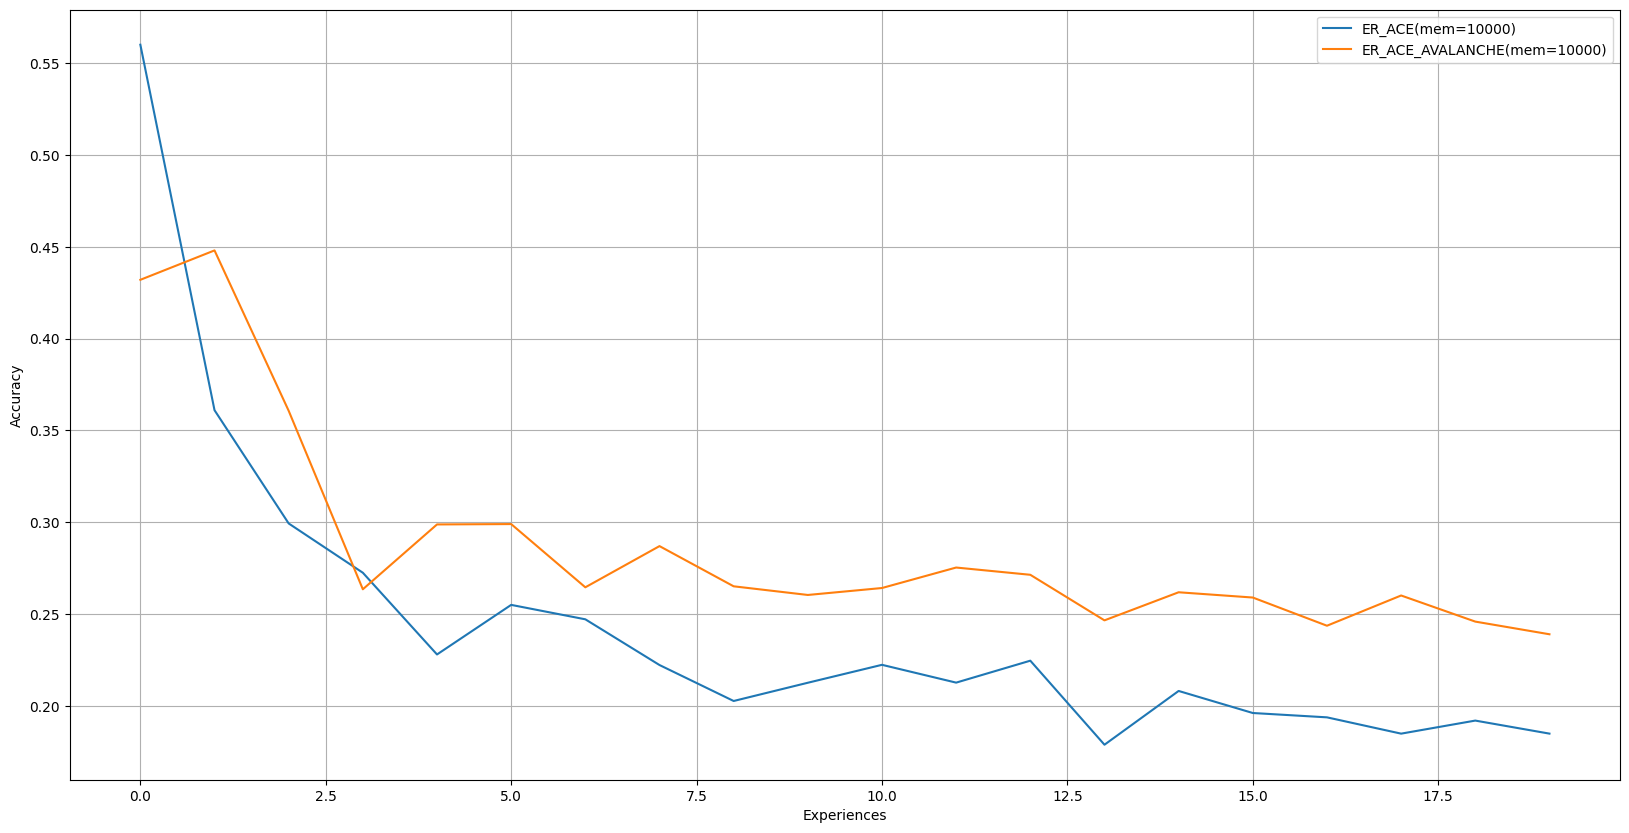

In [67]:
plt.figure(figsize=(20, 10))
plt.plot([sum(v.values()) / len(v.values()) for v in ERACE_results], label='ER_ACE(mem=10000)')
plt.plot([sum(v.values()) / len(v.values()) for v in ERACE_AVALANCHE_results], label='ER_ACE_AVALANCHE(mem=10000)')
plt.xlabel('Experiences')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()